# 무향 칼만 필터

- EKF의 대안으로 각광받은 무향칼만필터 (Unscented Kalman Filter, UKF)
- UKF는 EKF와 다르게 선형화 과정을 아예 생략
    - 선형모델의 부정확성으로 인한 불안정문제에서 상대적으로 자유로움
    
## UKF의 기본전략
- 칼만필터는 기본적으로 '예측'과 '추정' 반복
- 예측 및 추정과정은 비선형 시스템에도 문제 없음
- 그러나, 오차공분산의 예측값을 구하는 과정은 비선형 시스템에 해석적으로 구할 방법 없음
    - EKF는 선형화를 통한 근사화로 문제해결함 (그렇기 때문에 선형화 모델의 정확도가 관건, EKF의 문제 대부분이 선형화 모델 때문)
    
### UKF의 전략
- 선형화 대신 샘플링을 통한 근사화 전략 사용
    - 시스템 모델 수식을 직접 다루지 않고 시스템의 대표데이터 몇 개 이용해 상태변수와 오차공분산의 예측값 계산

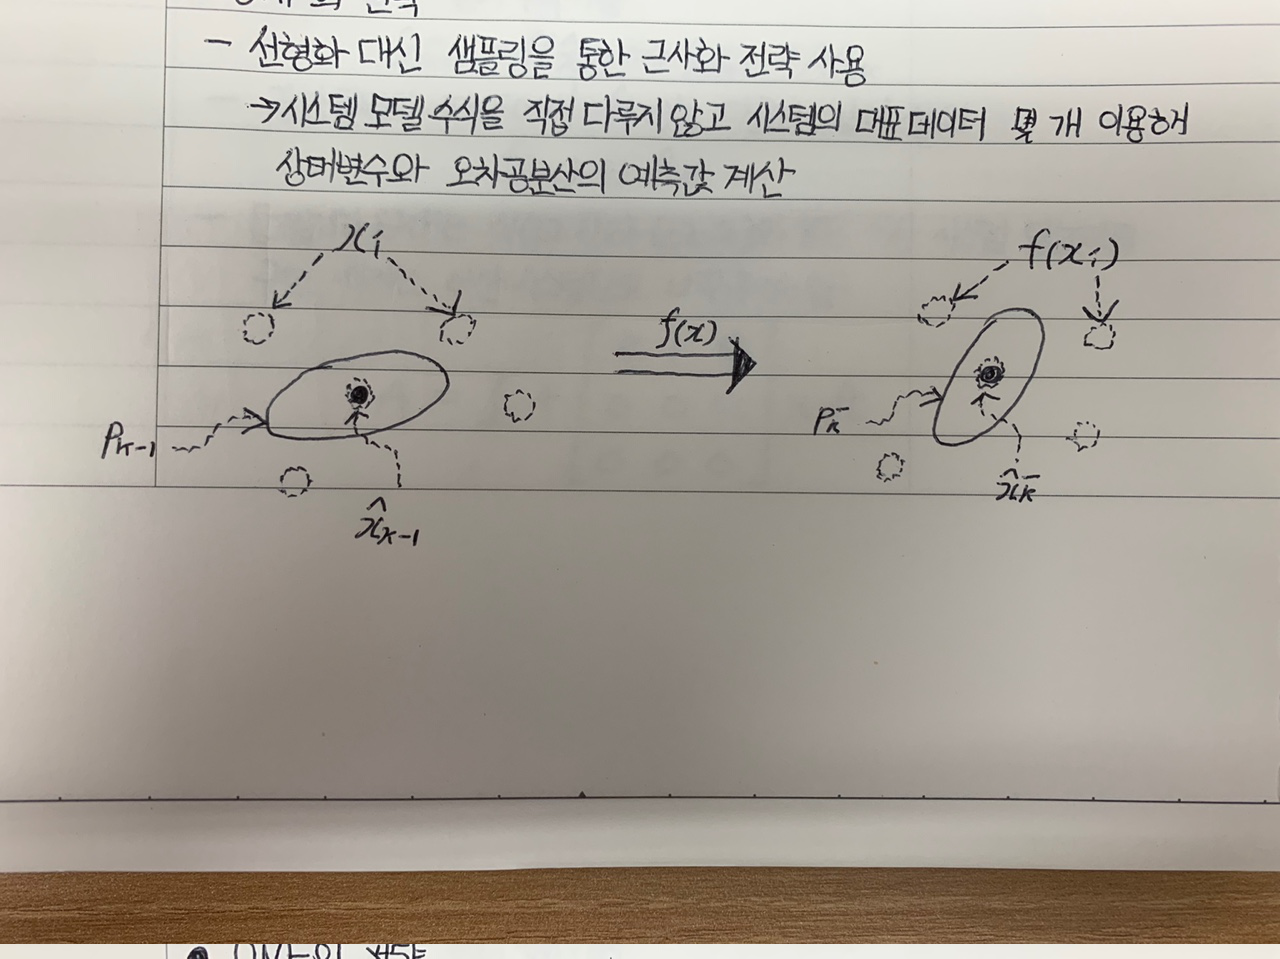

In [2]:
from PIL import Image
Image.open('./image/ch13_2.jpeg')

- 왼쪽은 직전시각(tk-1)의 상태, 오른쪽은 현재시각(tk)의 상태
- tk-1에서 추정값과 오차공분산을 나타내는 몇 개의 대표데이터가 존재한다고 가정
- tk에서 추정값과 오차공분산의 예측값은 위의 데이터들을 시스템모델로 변환한 데이터 f(xi)로 부터 구할 수 있음
    - 이를 무향 변환(Unscented Trasform, UT)라고 함
- 몇 개의 대표값(시그마 포인트)을 선정하고 이 값의 변환 데이터로부터 간접적으로 구하는 것이 UKF의 핵심 전략

## UKF 알고리즘
- UKF가 EKF와 가장 크게 다른점은 시스템 모델을 통한 예측이 필요한 곳마다 선형화 모델 대신 UT를 적절하게 활용

### 비선형 시스템 모델
- EKF와 동일한 비선형 모델 고려
    - xk+1 = f(xk) + wk
    - zk = h(xk) + vk
    
### UKF 알고리즘 단계

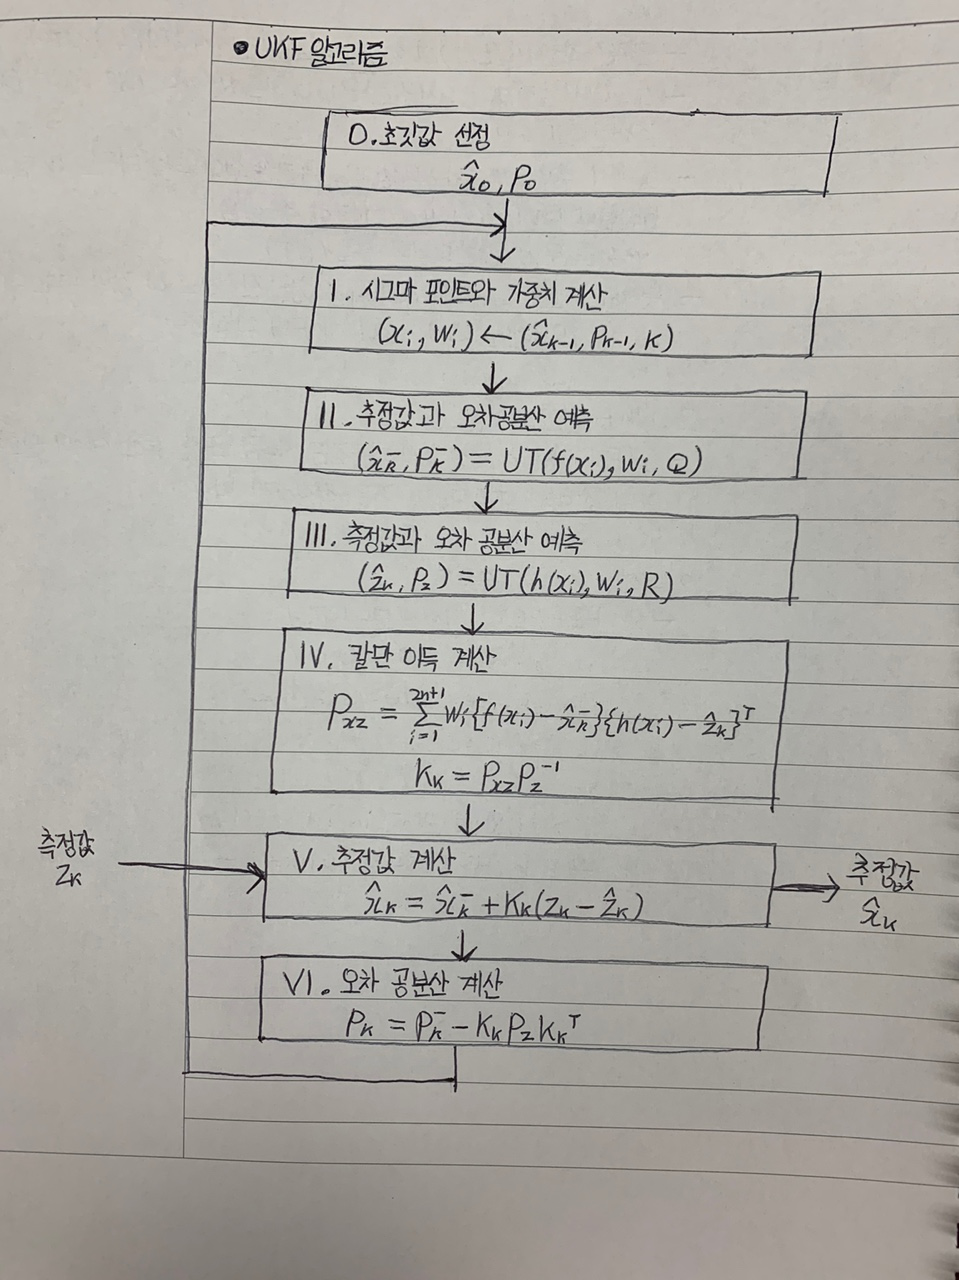

In [3]:
Image.open('./image/ch13_1.jpeg')

- 계산식은 좀 달라졌으나, [에측] -> [칼만이득 계산] -> [추정]의 반복구조는 그대로

### UKF 알고리즘 단계 별 역할
- 1단계 : 직전 시각의 추정값과 오차 공분산을 대표하는 시그마포인트와 가중치를 선정하는 작업
    - 가중치는 UT에서 시그마포인트와 함께 쓰이는 값
- 2단계 : 현재 시각에서의 상태변수와 오차공분산의 예측값을 구함
    - 선형칼만필터의 예측 과정 역할과 동일
    - 특이한 점은 상태변수의 예측값을 구할 때 시스템 모델 f(x)를 직접 사용하지 않고 시그마포인트와 UT를 통해 간접 계산
- 3단계 : UKF의 칼만이득 계산에 쓰이는 측정값의 오차공분산(Pz) 구함
    - 2단계와 마찬가지로 UT를 통해 간접계산
- 4단계 : 칼만이득 계산과정에 필요한 xk와 zk의 공분산행렬(Pxz) 계산, 그 후 Pxz와 측정값의 오차 공분산의 역행렬을 곱해 칼만이득 계산
    - Pxz 계산할 때도 UT 개념 활용
- 5,6단계 : 추정값과 오차공분산 수정
    - 수식은 약간 다르지만 예측값 보정하여 추정값 구하는 방식은 그대로
    
## 무향 변환
- UKF의 핵심기반은 무향 변환 (UT)

### UT 알고리즘
- 평균이 xm, 분산이 Px인 정규분포를 따르는 상태변수 x 고려
- x에 대해 시그마포인트와 가중치 정의
    - 책의 수식 참고 (식 13.4 / 13.5)
    - ui는 행렬 U의 행 벡터, k는 임의의 상수
    
- UT에서 시그마포인트는 상태변수의 확률분포를 대표하는 샘플데이터
- 가중치(Wi)는 평균과 공분산을 계산할 때 각 시그마포인트의 비중을 결정하는 상수
- UT에서 시그마포인트와 가중치는 다음과 같은 특성 만족

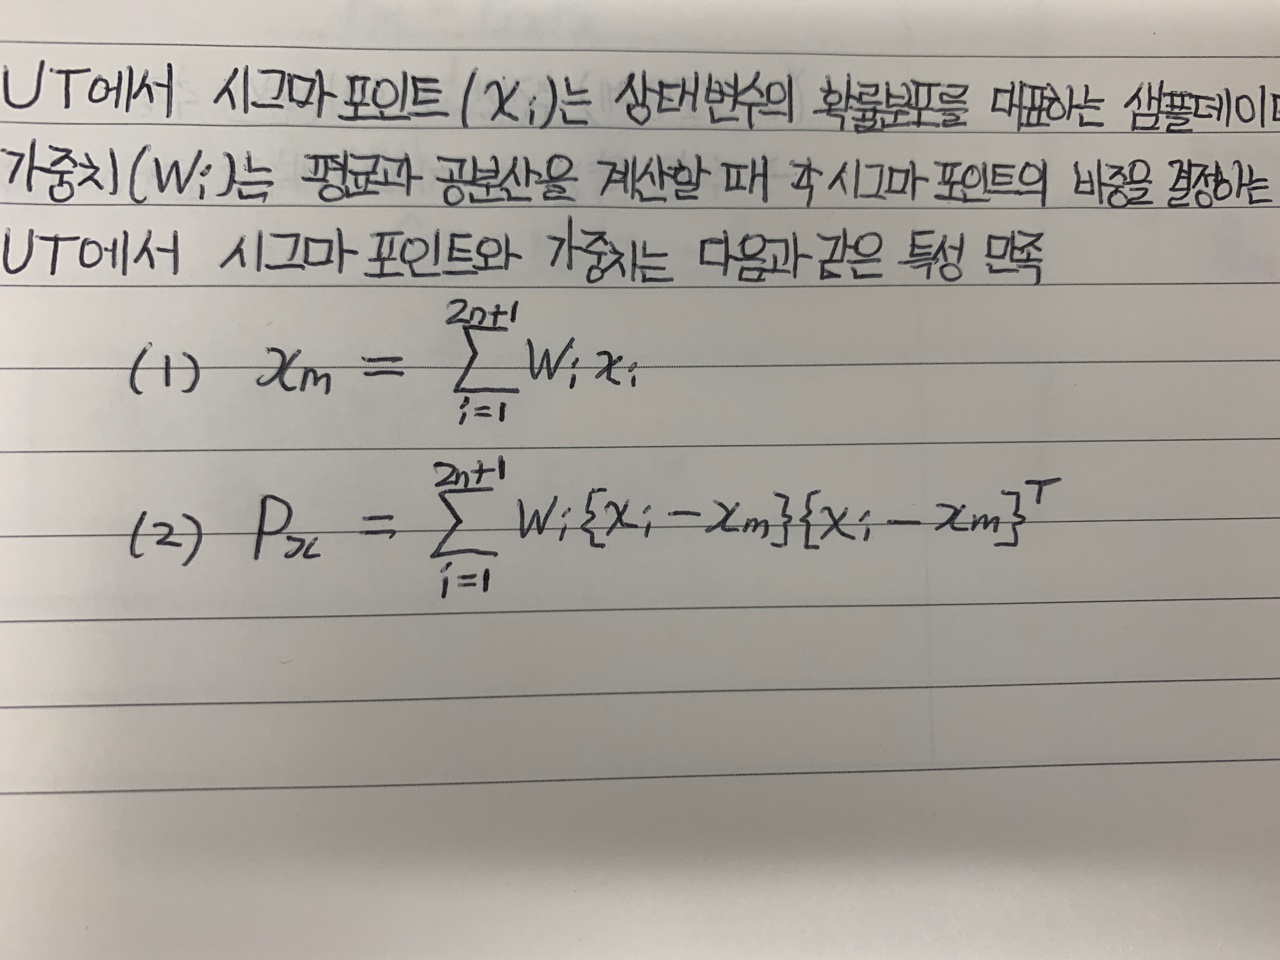

In [4]:
Image.open('./image/ch13_4.jpeg')

- (1)은 시그마포인트의 가중평균이 x의 평균값과 같다는 의미
- (2)는 시그마포인트의 가중공분산은 x의 공분산과 같다는 의미
    - 즉, 수식이나 무수히 많은 샘플을 동원하지 않고, 2n + 1개의 시그마포인트와 가중치만 있으면 x의 통계적 특성(평균, 공분산) 적절히 표현 가능
- 시그마포인트와 가중치는 상태변수의 통계적 특성을 대표하도록 선정된 값


- 함수 y = f(x)의 평균과 공분산 구하기
    - 함수 f(x)로 변환한 상태변수(y)의 분포를 변수x의 분포를 나타내는 시그마 포인트와 가중치 이용
    
### UT 알고리즘의 단계
1. x의 평균과 공분산에 맞춰 시그마포인트 선정
2. 시그마포인트들을 비선형 시스템 모델 f(x)로 변환
3. 변환된 데이터 f(xi)에 대해 각각 가중평균과 가중공분산 계산
    - 이 값이 UKF에서 필요로 하는 상태변수와 오차 공분산의 예측값 (= f(x)의 평균, 공분산의 근사값)


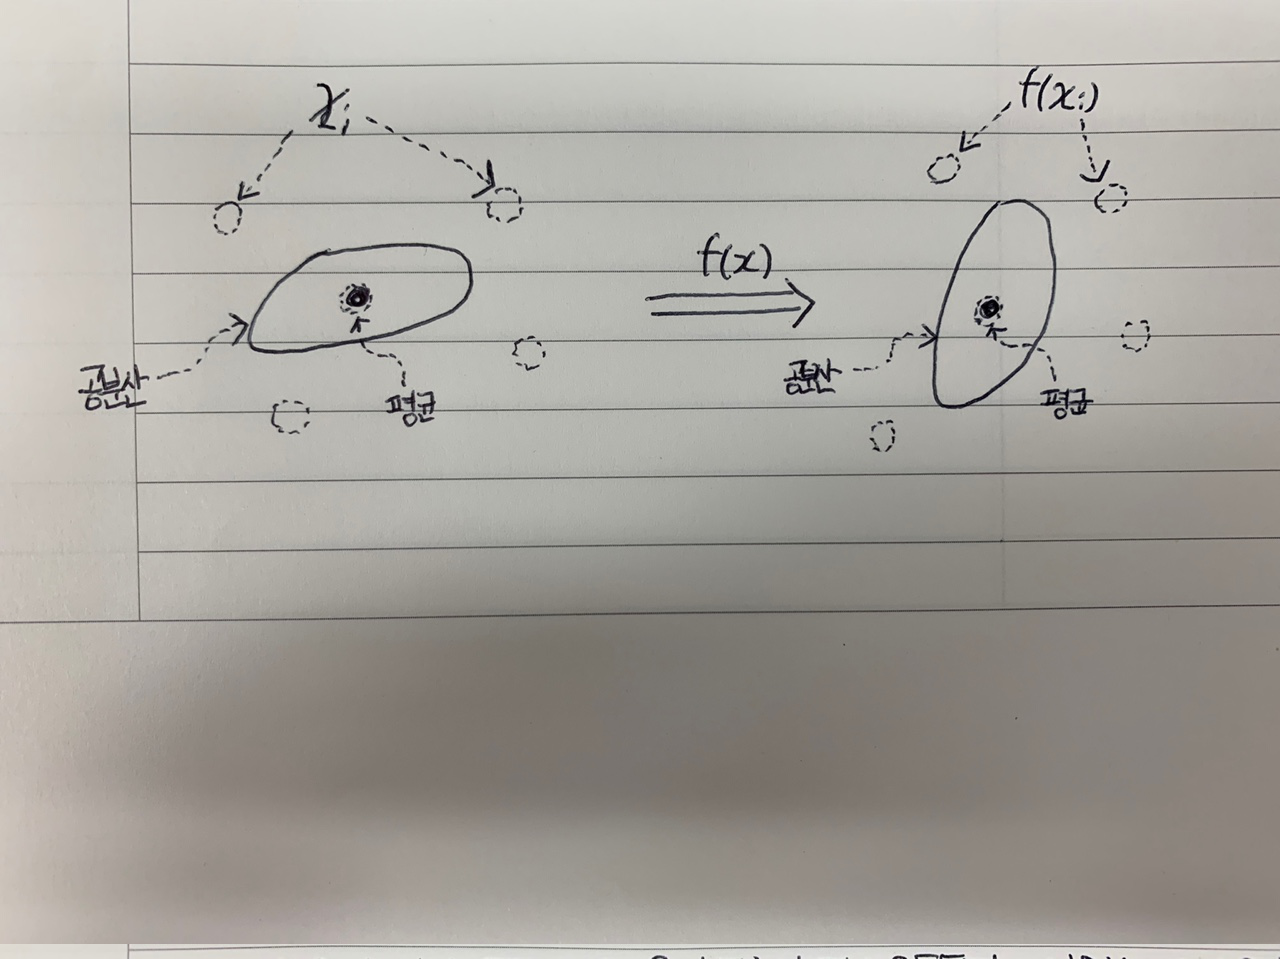

In [5]:
Image.open('./image/ch13_3.jpeg')

### UT 함수 구현
- 시그마 포인트와 가중치 계산

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, cholesky

np.random.seed(0)

In [6]:
def sigma_points(mu, Sigma, kappa): # 평균, 공분산, kappa(임의의 상수)
    n = len(mu)
    Xi = np.zeros((n, 2*n+1))
    W = np.zeros(2*n+1)
    
    Xi[:, 0] = mu
    W[0] = kappa / (n + kappa)
    
    U = cholesky((n + kappa)*Sigma) # numpy의 cholesky(숄레스키 분해) 사용 / uTu = (n + k)Px를 만족하는 행렬 U (p.176의 수식참고)
    
    for i in range(n):
        Xi[:, i+1]   = mu + U[:, i]
        Xi[:, n+i+1] = mu - U[:, i]
        W[i+1]       = 1 / (2*(n+kappa))
        W[n+i+1]     = W[i+1]
        
    return Xi, W # 시그마포인트와 가중치 반환

- UT 함수

In [7]:
def UT(Xi, W, noiseCov): # 시그마포인트, 가중치, 공분산 잡음
    mean = np.sum(W * Xi, axis=1)
    cov = W * (Xi - mean.reshape(-1, 1)) @ (Xi  - mean.reshape(-1, 1)).T
    return mean, cov + noiseCov #평균, 공분산

## 예제 : 레이다 추적
- 12장의 예제를 그대로 가져옴
- 물체까지의 직선 거리 측정하여 위치와 고도를 추정하는 문제

### UKF 함수

In [15]:
def unscented_kalman_filter(z_meas, x_esti, P):
    """Unscented Kalman Filter Algorithm."""
    # (1) Sample Sigma Points and Weights.
    Xi, W = sigma_points(x_esti, P, kappa)

    # (2) Predict Mean and Error Covariance of States.
    fXi = fx(Xi) # 시그마포인트를 f(x)에 대입해 새로운 시그마포인트 얻음
    x_pred, P_x = UT(fXi, W, Q) # 평균과 오차공분산 구함

    # (3) Calculate Mean and Error Covariance for the Expected Observation.
    hXi = hx(fXi)
    z_pred, P_z = UT(hXi, W, R) #h(x)의 평균과 오차공분산 구함

    # (4) Calculate Off Diagonal Elements of Error Covariance and Kalman Gain.
    Pxz = W * (fXi - x_pred.reshape(-1, 1)) @ (hXi - z_pred.reshape(-1, 1)).T # 시그마포인트와 평균 이용해 변수 x와 z의 공분산 구함
    K = Pxz @ inv(P_z) # 칼만이득 계산

    # (5) Estimate Mean and Error Covariance of States. 
    x_esti = x_pred + K @ (z_meas - z_pred)
    P = P_x - K @ P_z @ K.T

    return x_esti, P

In [20]:
def get_radar(xpos_pred):
    """레이다로 측정된 고도와 직선거리를 반환해줌"""
    xvel_w = np.random.normal(0, 5)   # xvel_w: system noise of horizontal velocity [m/s].
    xvel_true = 100 + xvel_w          # xvel_true: true horizontal velocity [m/s].

    ypos_w = np.random.normal(0, 10)  # ypos_w: system noise of vertical position [m].
    ypos_true = 1000 + ypos_w         # ypos_true: true vertical position [m].

    xpos_pred = xpos_pred + xvel_true * dt                     # xpos_pred: predicted horizontal distance [m].

    rpos_v = xpos_pred * np.random.normal(0, 0.05)             # rpos_v: measurment noise of distance from radar.
    rpos_meas = np.sqrt(xpos_pred**2 + ypos_true**2) + rpos_v  # r: measured distance [m] (observable).

    return rpos_meas, xpos_pred

- 비선형 시스템 모델

In [13]:
def fx(x_esti):
    return A @ x_esti

def hx(x_pred):
    z_pred = np.sqrt(x_pred[0]**2 + x_pred[2]**2)
    return np.array([z_pred])

In [14]:
# Input parameters.
time_end = 20
dt = 0.05

In [16]:
# Initialization for system model.
# Matrix: A, H, Q, R, P_0
# Vector: x_0
A = np.eye(3) + dt * np.array([[0, 1, 0],
                               [0, 0, 0],
                               [0, 0, 0]])
Q = np.array([[0.01, 0, 0],
              [0, 0.01, 0],
              [0, 0, 0.01]])
R = np.array([[100]])

# Initialization for estimation.
x_0 = np.array([0, 90, 1100])  # [horizontal position, horizontal velocity, vertical position].
P_0 = 100 * np.eye(3)

# Initialization for sigma points.
kappa = 0

In [18]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
xpos_esti_save = np.zeros(n_samples)
ypos_esti_save = np.zeros(n_samples)
rpos_esti_save = np.zeros(n_samples)
xvel_esti_save = np.zeros(n_samples)
rpos_meas_save = np.zeros(n_samples)

In [21]:
xpos_pred = 0
x_esti, P = None, None
for i in range(n_samples):
    z_meas, xpos_pred = get_radar(xpos_pred)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = unscented_kalman_filter(z_meas, x_esti, P)

    xpos_esti_save[i] = x_esti[0]
    ypos_esti_save[i] = x_esti[2]
    rpos_esti_save[i] = np.sqrt(x_esti[0]**2 + x_esti[2]**2)
    xvel_esti_save[i] = x_esti[1]
    rpos_meas_save[i] = z_meas

Text(0, 0.5, 'Horizontal Velocity [m/s]')

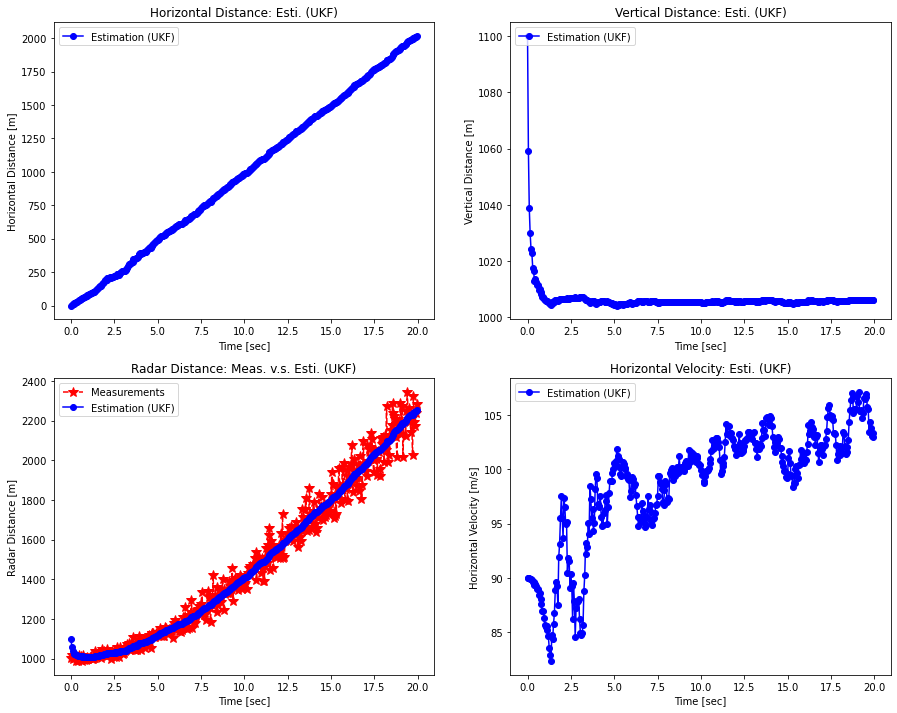

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

axes[0, 0].plot(time, xpos_esti_save, 'bo-', label='Estimation (UKF)')
axes[0, 0].legend(loc='upper left')
axes[0, 0].set_title('Horizontal Distance: Esti. (UKF)')
axes[0, 0].set_xlabel('Time [sec]')
axes[0, 0].set_ylabel('Horizontal Distance [m]')

axes[0, 1].plot(time, ypos_esti_save, 'bo-', label='Estimation (UKF)')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_title('Vertical Distance: Esti. (UKF)')
axes[0, 1].set_xlabel('Time [sec]')
axes[0, 1].set_ylabel('Vertical Distance [m]')

axes[1, 0].plot(time, rpos_meas_save, 'r*--', label='Measurements', markersize=10)
axes[1, 0].plot(time, rpos_esti_save, 'bo-', label='Estimation (UKF)')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_title('Radar Distance: Meas. v.s. Esti. (UKF)')
axes[1, 0].set_xlabel('Time [sec]')
axes[1, 0].set_ylabel('Radar Distance [m]')

axes[1, 1].plot(time, xvel_esti_save, 'bo-', label='Estimation (UKF)')
axes[1, 1].legend(loc='upper left')
axes[1, 1].set_title('Horizontal Velocity: Esti. (UKF)')
axes[1, 1].set_xlabel('Time [sec]')
axes[1, 1].set_ylabel('Horizontal Velocity [m/s]')

- EKF와 비교했을 때, UKF의 성능이 뒤지지 않음